<font color='tomato'><font color="#CC3D3D"><p>
# How to Build Neural Networks using Keras
https://www.tensorflow.org/tutorials?hl=ko    

### Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import random
import pickle
from IPython.display import Image
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.13.0-rc0


### Set random seeds to make your results reproducible

In [2]:
# 매번 모델링을 할 때마다 동일한 결과를 얻으려면 아래 코드를 실행해야 함.

def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(1)
    random.seed(2)
    tf.compat.v1.set_random_seed(3)
    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


### Step 1: Load and process the data

##### Read data

In [3]:
# 앞 단계(Feature Enginnering)에서 저장했던 훈련/평가/적용 데이터를 읽어온다.
X_train, X_test, y_train, y_test, X_dep, ID_dep = pd.read_pickle('case3_train_test.pkl')

# 모델링에 사용되는 최종 학습 및 평가 데이터 확인
X_train.shape, X_test.shape

((2450, 62), (1050, 62))

##### Feature scaling

In [4]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

##### Split data into train & validation set 

In [5]:
# Train/Validation
i = int(round(X_train.shape[0] * 0.8,0))
X_valid, y_valid = X_train[i:], y_train[i:]
X_train, y_train = X_train[:i], y_train[:i]

### Step 2: Define the model architecture

##### Stack layers from input to output

|모듈|사용 예 및 종류|
|---|:---:|
|Initializer| Dense(16, kernel_initializer='he_normal')|
|Regularizer| Dense(16, kernel_regularizer=l2(0.01))|
|Activation|relu / elu / selu / softmax / tanh / sigmoid / linear|

In [6]:
# Input => Dense + Dense + ... => output
# Model(input, output)

input = keras.Input(shape=(X_train.shape[1],))

In [7]:
x = keras.layers.Dense(16, activation='relu')(input)
x = keras.layers.Dense(8, activation='relu')(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(input, output)

Metal device set to: Apple M1 Pro


2023-05-23 00:04:10.659271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-23 00:04:10.659478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


*Keras Sequential API*
```
model = Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
  keras.layers.Dense(8),
  keras.layers.Dense(1, activation='sigmoid')
])
```

##### Summarize & visualize the model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 62)]              0         
                                                                 
 dense (Dense)               (None, 16)                1008      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


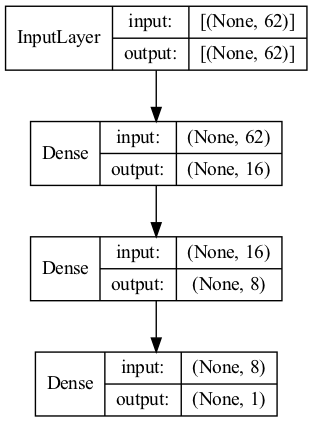

In [8]:
model.summary()
Image(keras.utils.model_to_dot(model,show_shapes=True,show_layer_names=False, dpi=100) \
      .create(prog='dot', format='png'))

### Step 3: Choose the optimizer and the cost function
<img align='left' src='http://drive.google.com/uc?export=view&id=1xybqHMvcDDfUYSN3FLQ6Y1708QkiZSJt' style="width: 70%">

*Optimizer의 예:*
- keras.optimizers.SGD(lr=0.01, momentum=0.9)
- keras.optimizers.RMSprop(lr=0.001, rho=0.9)
- keras.optimizers.Adagrad(lr=0.01)
- keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [9]:
# loss, optimizer, metrics 설정
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc', keras.metrics.AUC()])

### Step 4: Train the model

##### Set learning conditions & fit the model 

In [11]:
# batch size, epoch, 조기종료조건 등 설정
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),]
# keras.callbacks.ModelCheckpoint(filepath='best_nn_model.h5', monitor='val_loss', save_best_only=True)]

hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                 batch_size=64, epochs=50, callbacks=callbacks, shuffle=False, verbose=2)

Epoch 1/50
31/31 - 0s - loss: 0.5566 - acc: 0.7051 - auc: 0.7675 - val_loss: 0.5588 - val_acc: 0.6980 - val_auc: 0.7604 - 301ms/epoch - 10ms/step
Epoch 2/50
31/31 - 0s - loss: 0.5560 - acc: 0.7051 - auc: 0.7679 - val_loss: 0.5585 - val_acc: 0.6980 - val_auc: 0.7605 - 288ms/epoch - 9ms/step
Epoch 3/50
31/31 - 0s - loss: 0.5554 - acc: 0.7061 - auc: 0.7687 - val_loss: 0.5582 - val_acc: 0.7000 - val_auc: 0.7604 - 282ms/epoch - 9ms/step
Epoch 4/50
31/31 - 0s - loss: 0.5548 - acc: 0.7082 - auc: 0.7696 - val_loss: 0.5579 - val_acc: 0.6980 - val_auc: 0.7608 - 294ms/epoch - 9ms/step
Epoch 5/50
31/31 - 0s - loss: 0.5542 - acc: 0.7087 - auc: 0.7700 - val_loss: 0.5577 - val_acc: 0.7000 - val_auc: 0.7608 - 291ms/epoch - 9ms/step
Epoch 6/50
31/31 - 0s - loss: 0.5536 - acc: 0.7092 - auc: 0.7706 - val_loss: 0.5574 - val_acc: 0.6980 - val_auc: 0.7606 - 286ms/epoch - 9ms/step
Epoch 7/50
31/31 - 0s - loss: 0.5531 - acc: 0.7082 - auc: 0.7712 - val_loss: 0.5572 - val_acc: 0.7000 - val_auc: 0.7615 - 288ms/e

##### Visualize training history 

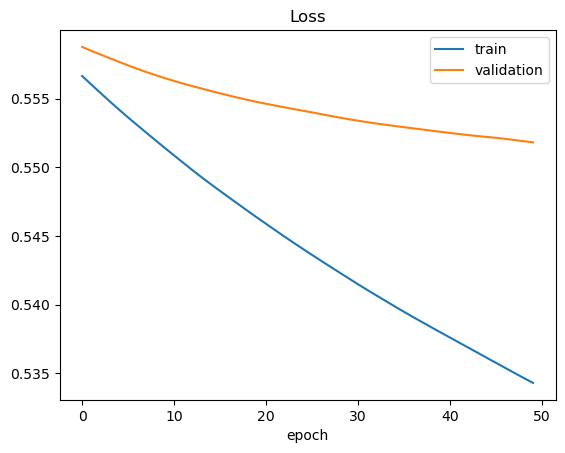

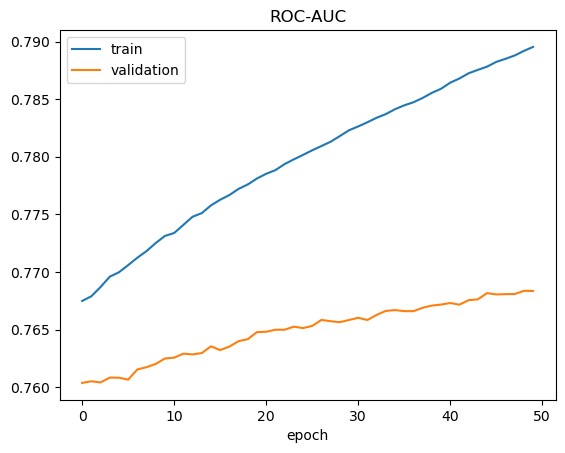

In [12]:
# Loss
plt.plot(hist.history["loss"], label="train")
plt.plot(hist.history["val_loss"], label="validation")
plt.legend()
plt.xlabel('epoch')
plt.title("Loss")
plt.show()

# ROC-AUC
plt.plot(hist.history["auc"], label="train")
plt.plot(hist.history["val_auc"], label="validation")
plt.legend()
plt.xlabel('epoch')
plt.title("ROC-AUC")
plt.show()

### Step 5: Evaluate the model performance

In [13]:
# Loss, Accuracy & ROC-AUC
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 9ms/step - loss: 0.5644 - acc: 0.7076 - auc: 0.7520


[0.5643634796142578, 0.7076190710067749, 0.7519523501396179]

### Step 6: Predict unseen data

In [14]:
# Generates output predictions for the input samples
model.predict(X_dep).flatten()

78/78 [==============================] - 0s 2ms/step


2023-05-23 00:09:44.161281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([0.80318457, 0.27455544, 0.10419507, ..., 0.6845905 , 0.213498  ,
       0.58319426], dtype=float32)

In [15]:
# Get class labels
np.where(model.predict(X_dep) > 0.5, 1, 0).flatten()

78/78 [==============================] - 0s 2ms/step


array([1, 0, 0, ..., 1, 0, 1])

In [16]:
# Make submissions: (결과) 0.762053
t = pd.Timestamp.now()
fname = f"dnn_submission_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
pd.DataFrame({'cust_id': ID_dep, 'gender': model.predict(X_dep).flatten()}).to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

78/78 [==============================] - 0s 2ms/step
'dnn_submission_05230009.csv' is ready to submit.


###  Step 7: Save the model for future use

In [17]:
# pickle 형식으로 저장
# with open('nn_model.pkl', 'wb') as f:
#    pickle.dump(model, f)

# 추후 저장한 모형 불러올 때: 
# model = pd.read_pickle('nn_model.pkl')

In [18]:
# h5 형식으로 저장
# model.save('nn_model.h5')

# 추후 저장한 모형 불러올 때: 
# model = load_model('nn_model.h5')

<font color="#CC3D3D"><p>
# End